In [13]:
# First we have to import the libraries
import pandas as pd
import numpy as np

In [14]:
# Here we are going to import the first benign dataset fron 'data' folder
benign = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_benign.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 0 for all the rows
benign['class'] = 0 # This is because we assume that all the data dns traffic in that dataset is benign

# Now we are going to import the first malicious dataset from 'data' folder
malicious = pd.read_csv('C:\\Users\\gaibo\\OneDrive\\Escritorio\\Python Projects\\DNS Traffic Control\\Data\\stateless_features-light_compressed.pcap.csv')

# Now we are going to create another column in the dataset named 'class' which will have value 1 for all the rows
malicious['class'] = 1 # This is because we assume that all the data dns traffic in that dataset is malicious

# Now we are going to merge both the datasets
data_merged = pd.concat([benign, malicious])

In [15]:
# To avoid bias we are going to shuffle the dataset
data = data_merged.sample(frac=1).reset_index(drop=True)

In [16]:
# Before splitting the dataset, we have to clean the dataset. 
# Firs we are going to remove the columns "longest_word" and "sld"
data = data.drop(['longest_word', 'sld', 'timestamp'], axis=1)

# Then lets remove NaN values from the dataset
data = data.dropna()

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,class
0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,0
1,7,0,0,6,0,1.500000,1,2,3,3.000000,4,0,0
2,17,0,0,14,1,2.963120,2,3,10,5.000000,11,0,0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,0
4,19,3,0,17,0,2.929439,2,3,11,5.666667,15,1,0


In [17]:
# Lets normalize the numerical data
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit the data on the scaler object
data[['FQDN_count', 'subdomain_length', 'entropy', 'len']] = scaler.fit_transform(data[['FQDN_count', 'subdomain_length', 'entropy', 'len']])

# Print head of the dataset
data.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,class
0,0.735294,0.434783,0,10,11,0.588151,6,6,7,3.666667,0.387097,1,0
1,0.147059,0.000000,0,6,0,0.320389,1,2,3,3.000000,0.064516,0,0
2,0.441176,0.000000,0,14,1,0.686384,2,3,10,5.000000,0.290323,0,0
3,0.735294,0.434783,0,10,11,0.588151,6,6,7,3.666667,0.387097,1,0
4,0.500000,0.130435,0,17,0,0.677959,2,3,11,5.666667,0.419355,1,0


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('class', axis=1), data['class'], test_size=0.2, random_state=42)

# Create KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the class labels for test set
y_pred = knn.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy) # This is lower then the accuracy of the Random Forest Classifier

Accuracy: 0.8441743086656714


c:\Users\gaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\gaibo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


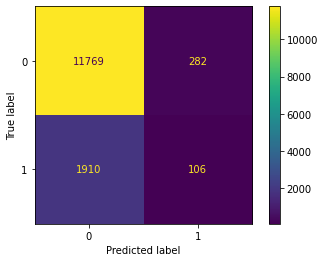

In [24]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot the confusion matrix
plot_confusion_matrix(knn, X_test, y_test)  
plt.show()